<a href="https://colab.research.google.com/github/OleksiiLatypov/llm-zoomcamp/blob/main/hw_ml_zoomcamp/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-04 08:08:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.05s   

2024-10-04 08:08:57 (5.34 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from typing import Optional

In [3]:
df = pd.read_csv("/content/laptops.csv")

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [8]:
df.isna().sum()

,0
laptop,0
status,0
brand,0
model,0
cpu,0
ram,0
storage,0
storage_type,42
gpu,1371
screen,4


In [9]:
df = df[['ram', 'storage', 'screen', 'final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


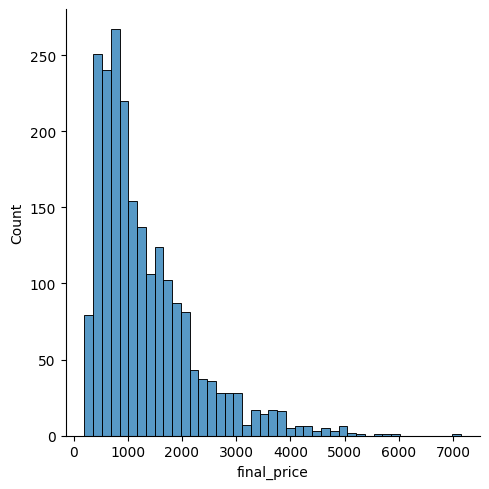

In [10]:
sns.displot(df['final_price'])

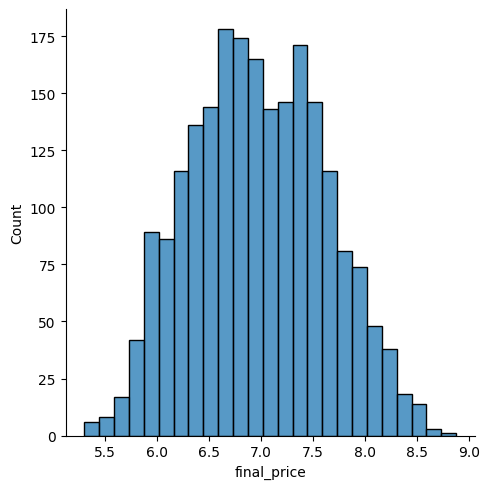

In [12]:
sns.displot(np.log(df['final_price']))

In [25]:
df.isna().sum().sort_values(ascending=False)
df_with_nan = df.columns[df.isna().any()]
df_with_nan

Index(['screen'], dtype='object')

**Question 2**

In [26]:
ram_median = df['ram'].median()
ram_median

16.0

**Question 3**

In [27]:
n = len(df)
n_val = int(len(df) * 0.2)

n_test = int(len(df) * 0.2)

n_train = n - n_val - n_test


In [28]:
n_train, n_val, n_test

(1296, 432, 432)

In [29]:
df_train = df.iloc[:n_train, :]
df_val = df.iloc[n_train:n_train+n_val, :]
df_test = df.iloc[n_train+n_val:, :]

In [30]:
idx = np.arange(n)

In [31]:
np.random.seed(42)
np.random.shuffle(idx)

In [32]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [33]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [34]:
df_train.isnull().sum()

,0
ram,0
storage,0
screen,3
final_price,0


In [35]:
features = ['ram', 'storage', 'screen']
X_train = df_train[features].fillna(0)
X_train.isnull().sum()

,0
ram,0
storage,0
screen,0


In [36]:
X_train = X_train.to_numpy()
X_train[:5]

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       [  16. ,  512. ,   13.3],
       [  32. , 1000. ,   16. ]])

In [39]:
y_train = df_train['final_price'].to_numpy()
y_train[:5]

array([1123.29,  201.05,  997.74, 1016.  , 2739.  ])

In [46]:
def train_linear_regression(X, y):

  ones = np.ones(X.shape[0])

  X = np.column_stack([ones, X])

  XTX = np.dot(X.T, X)

  XTX_inv = np.linalg.inv(XTX)

  w_full = np.dot(XTX_inv, X.T) @ y

  return w_full[0], w_full[1:]

In [47]:
w0, w = train_linear_regression(X_train, y_train)


In [48]:
w0, w

(676.8954853003995, array([ 43.70681555,   0.86506867, -36.10399833]))

In [50]:
y_pred = w0 + np.dot(X_train, w)

In [51]:
y_pred

array([2377.35987681,  398.02076576, 2435.12627415, ..., 1255.89731808,
       1313.66371541, 1313.66371541])

<Axes: ylabel='Count'>

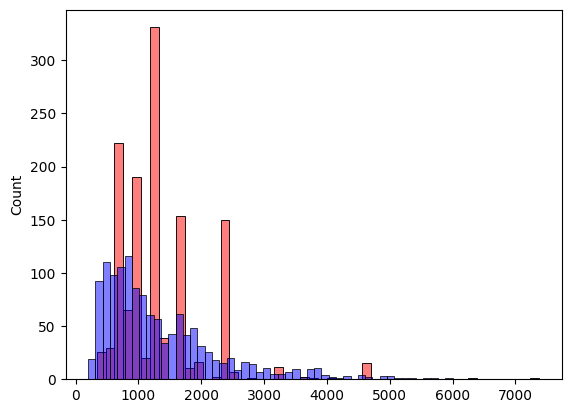

In [52]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [53]:
w0, w = train_linear_regression(X_train, y_train)
print(w0, w)

676.8954853003995 [ 43.70681555   0.86506867 -36.10399833]


**RMSE**

In [54]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [56]:
rmse(y_train, y_pred)

602.3920520606714

In [58]:
train_means = df_train[features].mean()

# Fill missing values in the training set with the calculated means
X_train_with_mean = df_train[features].fillna(train_means)

In [59]:
X_train_with_mean.isnull().sum()

,0
ram,0
storage,0
screen,0


In [60]:
X_train_with_mean.to_numpy()

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [61]:
w0_m, w_m = train_linear_regression(X_train_with_mean, y_train)
w0_m, w_m

(808.9159907334033, array([ 43.90774584,   0.87135236, -45.18273312]))

In [62]:
y_pred_m = w0_m + np.dot(X_train_with_mean, w)
y_pred_m

array([2509.38038225,  530.0412712 , 2567.14677958, ..., 1387.91782351,
       1445.68422085, 1445.68422085])

In [63]:
print(rmse(y_train, y_pred))
print(rmse(y_train, y_pred_m))

602.3920520606714
616.3002988099252


In [66]:
y_val = df_val.final_price.values
y_val[:10]

array([2599.  ,  999.  ,  477.28, 1519.  ,  402.99,  849.  , 1496.56,
        829.01,  449.  , 3818.77])

**Fill NaN with zeros**

In [96]:
def prepare_X(df: Optional[pd.DataFrame], value)-> Optional[np.array]:
    df_num = df[features]
    df_num = df_num.fillna(value)
    X = df_num.values
    return X

In [97]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

597.36

**Fill NaN with mean**

In [98]:
df_mean = df[features].mean()
X_train = prepare_X(df_train, df_mean)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val, df_mean)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

600.27

**Fill NaN with 0 provides better result**




**Question 4**

**Regularization**

In [99]:
def train_linear_regression_reg(X, y, r=0):

  ones = np.ones(X.shape[0])

  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)

  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)

  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [116]:
result_score = {}

for i in [0, 0.01, 0.1, 1, 10, 100]:

  X_train = prepare_X(df_train, 0)

  w_0, w = train_linear_regression_reg(X_train, y_train, r=i)

  X_val = prepare_X(df_val, 0)

  y_pred = w_0 + np.dot(X_val, w)

  score = rmse(y_val, y_pred)

  result_score[f'reg_coef_{i}'] = round(score, 2)

  print(f'reg_coeff: {i}, score: {round(score, 2)}')

reg_coeff: 0, score: 597.36
reg_coeff: 0.01, score: 597.36
reg_coeff: 0.1, score: 597.35
reg_coeff: 1, score: 597.21
reg_coeff: 10, score: 597.06
reg_coeff: 100, score: 597.9


In [118]:
for k, v in result_score.items():
  if v == min(result_score.values()):
    print(k)

reg_coef_10


In [125]:
r = list(filter(lambda x: result_score[x] == min(result_score.values()), result_score))
r

['reg_coef_10']

**reg_coeff: 10, score: 597.06**

**Question 5**

In [128]:

rmse_scores = []

# Iterate over seeds [0, 1, ..., 9]
for seed in range(10):
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)  # Shuffle indices based on seed

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    # Prepare feature matrices
    X_train = prepare_X(df_train, 0)
    y_train = df_train['final_price'].values
    X_val = prepare_X(df_val, 0)
    y_val = df_val['final_price'].values

    # Train the linear regression model
    w0, w = train_linear_regression(X_train, y_train)

    # Make predictions on validation set
    y_pred = w0 + np.dot(X_val, w)

    # Calculate RMSE and append to scores list
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

# Calculate the standard deviation of the RMSE scores
std = np.std(rmse_scores)

# Print the result rounded to 3 decimal places
print(f'Standard Deviation of RMSE scores: {round(std, 3)}')


Standard Deviation of RMSE scores: 29.176


**Standard Deviation of RMSE scores: 29.176**

**Question 6**

In [136]:
# Seed 9 for the split
np.random.seed(9)


# Combine train and validation datasets
df_train_full = pd.concat([df_train, df_val], axis=0, ignore_index=True)

# Prepare feature matrices
X_train_full = prepare_X(df_train_full, 0)
y_train_full = df_train_full['final_price'].values
X_test = prepare_X(df_test, 0)
y_test = df_test['final_price'].values

# Train the linear regression model with r=0.001 (ridge regularization)
w0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)

# Make predictions on the test set
y_pred = w0 + np.dot(X_test, w)

# Calculate RMSE on the test set
test_rmse = rmse(y_test, y_pred)

# Print the RMSE
print(f'RMSE on the test dataset: {test_rmse}')


RMSE on the test dataset: 608.609982204956


**RMSE on the test dataset: 608.61**

**Solution with SKLERAN LinearRegression**

In [138]:
from sklearn.linear_model import LinearRegression

In [140]:
lr = LinearRegression()
lr.fit(X_train_full, y_train_full)

LinearRegression()

In [142]:
y_pred_lr = lr.predict(X_test)
y_pred_lr[:10]

array([1319.83246472, 1296.58574011, 1257.8411991 , 1168.72875476,
       1296.58574011, 4546.75622499,  726.32085889,  726.32085889,
       1168.72875476, 3206.63882769])

In [143]:
test_rmse_lr = rmse(y_test, y_pred_lr)
test_rmse_lr

608.6102791248059

**Solution with Gradient Descent LinearRegression**

In [199]:
import numpy as np

def gradient_descent(X, y, lr=0.01, n_iterations=1000):
    # Get the number of samples and features
    n_samples, n_features = X.shape

    # Initialize weights (for features) and bias (intercept)
    w = np.zeros(n_features)  # weights
    w0 = 0  # intercept

    # List to store the loss at each iteration
    loss_history = []

    for i in range(n_iterations):
        # Prediction: h(X) = w0 + X.w
        y_pred = w0 + np.dot(X, w)

        # Compute gradients
        w_gr = -2 * np.dot(X.T, (y - y_pred)) / n_samples  # Gradient for weights
        w0_gr = -2 * np.sum(y - y_pred) / n_samples  # Gradient for intercept

        # Update weights and bias
        w -= lr * w_gr  # Update weights with w gradient
        w0 -= lr * w0_gr  # Update intercept with w0 gradient

        # Calculate Mean Squared Error (MSE) and store it
        score = np.mean((y - y_pred)**2)
        loss_history.append(np.sqrt(score))

        # Optionally print the loss at every 100 iterations
        if i % 100 == 0:
            print(f'Iteration {i} with Loss {np.sqrt(score)}')
    return w, w0, loss_history

# Normalize X_train_full to avoid overflow (optional but recommended)
X_train_full_normalized = (X_train_full - X_train_full.mean(axis=0)) / X_train_full.std(axis=0)

# Run gradient descent
w, w0, loss_history = gradient_descent(X_train_full_normalized, y_train_full, lr=0.003, n_iterations=2000)

print(f"Final bias (w0): {w0}")
print(f"Final weights (w): {w}")


Iteration 0 with Loss 1579.9925612617537
Iteration 100 with Loss 955.7813820678152
Iteration 200 with Loss 713.7472315043351
Iteration 300 with Loss 627.4435254983784
Iteration 400 with Loss 599.1926995551154
Iteration 500 with Loss 590.3044941783319
Iteration 600 with Loss 587.5287274088586
Iteration 700 with Loss 586.6524819674551
Iteration 800 with Loss 586.3679965455331
Iteration 900 with Loss 586.2704094302981
Iteration 1000 with Loss 586.2335047227238
Iteration 1100 with Loss 586.217344118118
Iteration 1200 with Loss 586.2089469721468
Iteration 1300 with Loss 586.2038862668824
Iteration 1400 with Loss 586.2005202078861
Iteration 1500 with Loss 586.1981556689691
Iteration 1600 with Loss 586.1964486244119
Iteration 1700 with Loss 586.1951999898045
Iteration 1800 with Loss 586.1942809743053
Iteration 1900 with Loss 586.1936025628639
1303.4559213806428
Final bias (w0): 1303.4559213806428
Final weights (w): [410.11377277 327.13320722 -51.89397535]


In [204]:
#w_0, w, loss_history = gradient_descent(X_train_full, y_train_full, l_r=0.01, n_iterations=1000)
w0, w

(1303.4559213806428, array([410.11377277, 327.13320722, -51.89397535]))

In [200]:
print(f"Final bias (w_0): {w_0}")
print(f"Final weights (w): {w}")

Final bias (w_0): [nan nan nan]
Final weights (w): [410.11377277 327.13320722 -51.89397535]


In [201]:
# Predict with the trained model
y_pred = 1303.4636436396465 + np.dot(X_train_full_normalized, w)
y_pred

array([2352.30076583,  986.82325722,  897.56325469, ...,  663.91714169,
       1234.0131241 , 1234.0131241 ])

In [202]:
res = rmse(y_train_full, y_pred)
res

586.1931010010819